In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import graphviz
from graphviz import Graph

from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from jupyterthemes import jtplot
jtplot.style()

from acquire import get_telco_data
from prepare import clean_telco
import explore

plt.rcParams['figure.figsize'] = (4, 2)

In [2]:
telco = get_telco_data()
telco = clean_telco(telco)
telco.to_csv('telco_clean.csv')

In [3]:
train, validate, test = explore.train_validate_test_split(telco,'churn_Yes', seed=4545)
train.shape, validate.shape, test.shape

((3943, 26), (1691, 26), (1409, 26))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 415 to 5394
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             3943 non-null   object 
 1   tenure                                  3943 non-null   int64  
 2   monthly_charges                         3943 non-null   float64
 3   total_charges                           3943 non-null   float64
 4   gender_Male                             3943 non-null   uint8  
 5   partner_Yes                             3943 non-null   uint8  
 6   dependents_Yes                          3943 non-null   uint8  
 7   phone_service_Yes                       3943 non-null   uint8  
 8   paperless_billing_Yes                   3943 non-null   uint8  
 9   churn_Yes                               3943 non-null   uint8  
 10  online_security_Yes                     3943 non-null   ui

In [5]:
cat_vars = ['gender_Male',
            'partner_Yes',
            'dependents_Yes',
            'phone_service_Yes',
            'paperless_billing_Yes',
            'churn_Yes',
            'online_security_Yes',
            'online_backup_Yes',
            'device_protection_Yes',
            'tech_support_Yes',
            'streaming_tv_Yes',
            'streaming_movies_Yes',
            'multiple_lines_Yes',
            'contract_type_Month-to-month',
            'contract_type_One year',
            'contract_type_Two year',
            'internet_service_type_DSL',
            'internet_service_type_Fiber optic',
            'payment_type_Bank transfer (automatic)',
            'payment_type_Credit card (automatic)',
            'payment_type_Electronic check',
            'payment_type_Mailed check']

quant_vars = ['tenure', 'monthly_charges', 'total_charges']

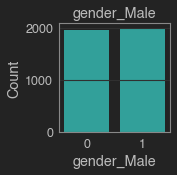

   gender_Male  Count  Percent
1            1   1984    50.32
0            0   1959    49.68
_________________________________________________________________


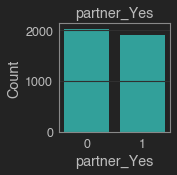

   partner_Yes  Count  Percent
0            0   2033    51.56
1            1   1910    48.44
_________________________________________________________________


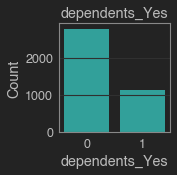

   dependents_Yes  Count  Percent
0               0   2792    70.81
1               1   1151    29.19
_________________________________________________________________


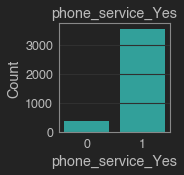

   phone_service_Yes  Count  Percent
1                  1   3543    89.86
0                  0    400    10.14
_________________________________________________________________


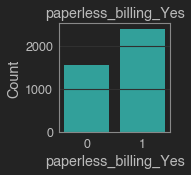

   paperless_billing_Yes  Count  Percent
1                      1   2397    60.79
0                      0   1546    39.21
_________________________________________________________________


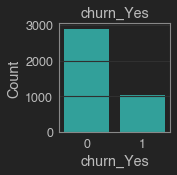

   churn_Yes  Count  Percent
0          0   2897    73.47
1          1   1046    26.53
_________________________________________________________________


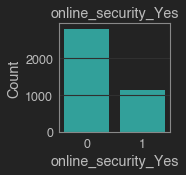

   online_security_Yes  Count  Percent
0                    0   2808    71.21
1                    1   1135    28.79
_________________________________________________________________


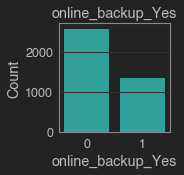

   online_backup_Yes  Count  Percent
0                  0   2584    65.53
1                  1   1359    34.47
_________________________________________________________________


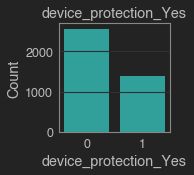

   device_protection_Yes  Count  Percent
0                      0   2563     65.0
1                      1   1380     35.0
_________________________________________________________________


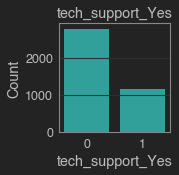

   tech_support_Yes  Count  Percent
0                 0   2786    70.66
1                 1   1157    29.34
_________________________________________________________________


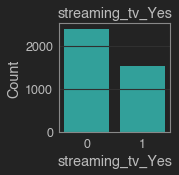

   streaming_tv_Yes  Count  Percent
0                 0   2404    60.97
1                 1   1539    39.03
_________________________________________________________________


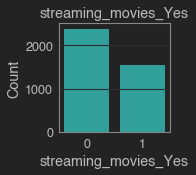

   streaming_movies_Yes  Count  Percent
0                     0   2386    60.51
1                     1   1557    39.49
_________________________________________________________________


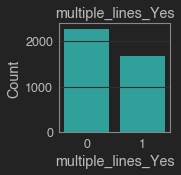

   multiple_lines_Yes  Count  Percent
0                   0   2269    57.55
1                   1   1674    42.45
_________________________________________________________________


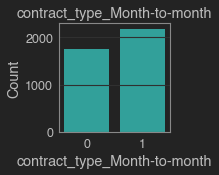

   contract_type_Month-to-month  Count  Percent
1                             1   2186    55.44
0                             0   1757    44.56
_________________________________________________________________


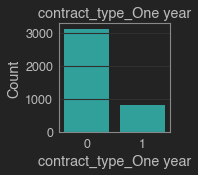

   contract_type_One year  Count  Percent
0                       0   3121    79.15
1                       1    822    20.85
_________________________________________________________________


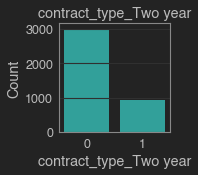

   contract_type_Two year  Count  Percent
0                       0   3008    76.29
1                       1    935    23.71
_________________________________________________________________


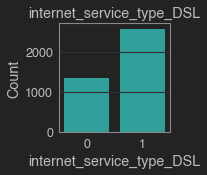

   internet_service_type_DSL  Count  Percent
0                          1   2585    65.56
1                          0   1358    34.44
_________________________________________________________________


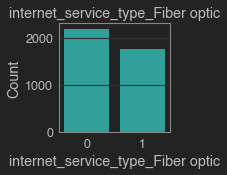

   internet_service_type_Fiber optic  Count  Percent
0                                  0   2190    55.54
1                                  1   1753    44.46
_________________________________________________________________


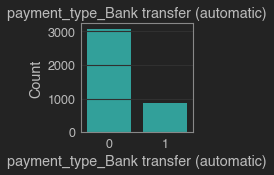

   payment_type_Bank transfer (automatic)  Count  Percent
0                                       0   3083    78.19
1                                       1    860    21.81
_________________________________________________________________


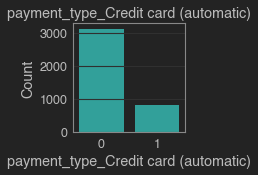

   payment_type_Credit card (automatic)  Count  Percent
0                                     0   3122    79.18
1                                     1    821    20.82
_________________________________________________________________


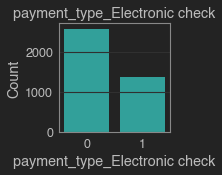

   payment_type_Electronic check  Count  Percent
0                              0   2577    65.36
1                              1   1366    34.64
_________________________________________________________________


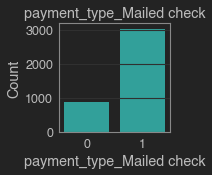

   payment_type_Mailed check  Count  Percent
0                          1   3047    77.28
1                          0    896    22.72
_________________________________________________________________


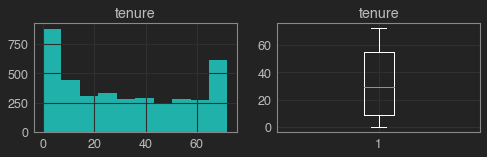

count    3943.000000
mean       32.365204
std        24.430116
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


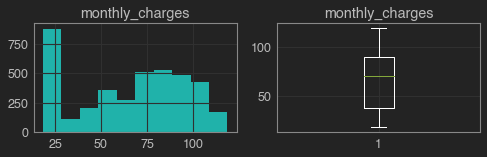

count    3943.000000
mean       65.128329
std        30.049253
min        18.400000
25%        37.475000
50%        70.450000
75%        90.100000
max       118.750000
Name: monthly_charges, dtype: float64


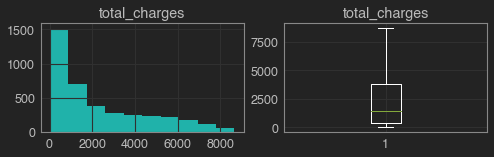

count    3943.000000
mean     2280.987497
std      2252.862892
min        18.800000
25%       415.725000
50%      1415.000000
75%      3831.850000
max      8672.450000
Name: total_charges, dtype: float64


In [6]:
explore.explore_univariate(train, cat_vars, quant_vars)

gender_Male 
_____________________

       chi2   p-value  degrees of freedom
0  0.120725  0.728249                   1

observed:
 churn_Yes       0     1   All
gender_Male                  
0            1434   525  1959
1            1463   521  1984
All          2897  1046  3943

expected:
              0           1
0  1439.316003  519.683997
1  1457.683997  526.316003


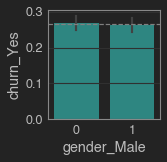


_____________________

partner_Yes 
_____________________

        chi2       p-value  degrees of freedom
0  82.955788  8.390929e-20                   1

observed:
 churn_Yes       0     1   All
partner_Yes                  
0            1367   666  2033
1            1530   380  1910
All          2897  1046  3943

expected:
              0           1
0  1493.685265  539.314735
1  1403.314735  506.685265


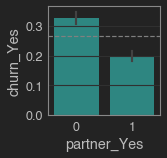


_____________________

dependents_Yes 
_____________________

        chi2       p-value  degrees of freedom
0  99.685041  1.786656e-23                   1

observed:
 churn_Yes          0     1   All
dependents_Yes                  
0               1925   867  2792
1                972   179  1151
All             2897  1046  3943

expected:
             0          1
0  2051.33756  740.66244
1   845.66244  305.33756


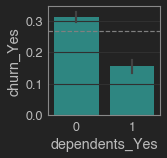


_____________________

phone_service_Yes 
_____________________

       chi2   p-value  degrees of freedom
0  8.647016  0.003276                   1

observed:
 churn_Yes             0     1   All
phone_service_Yes                  
0                   319    81   400
1                  2578   965  3543
All                2897  1046  3943

expected:
              0           1
0   293.887903  106.112097
1  2603.112097  939.887903


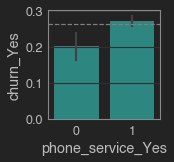


_____________________

paperless_billing_Yes 
_____________________

         chi2       p-value  degrees of freedom
0  146.154668  1.200960e-33                   1

observed:
 churn_Yes                 0     1   All
paperless_billing_Yes                  
0                      1300   246  1546
1                      1597   800  2397
All                    2897  1046  3943

expected:
              0           1
0  1135.876744  410.123256
1  1761.123256  635.876744


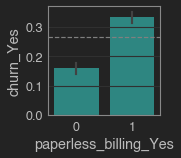


_____________________

churn_Yes 
_____________________

          chi2  p-value  degrees of freedom
0  3937.871007      0.0                   1

observed:
 churn_Yes     0     1   All
churn_Yes                  
0          2897     0  2897
1             0  1046  1046
All        2897  1046  3943

expected:
              0           1
0  2128.483135  768.516865
1   768.516865  277.483135


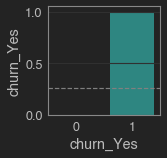


_____________________

online_security_Yes 
_____________________

         chi2       p-value  degrees of freedom
0  101.724858  6.379476e-24                   1

observed:
 churn_Yes               0     1   All
online_security_Yes                  
0                    1936   872  2808
1                     961   174  1135
All                  2897  1046  3943

expected:
              0           1
0  2063.093076  744.906924
1   833.906924  301.093076


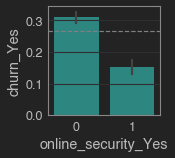


_____________________

online_backup_Yes 
_____________________

       chi2   p-value  degrees of freedom
0  20.06437  0.000007                   1

observed:
 churn_Yes             0     1   All
online_backup_Yes                  
0                  1839   745  2584
1                  1058   301  1359
All                2897  1046  3943

expected:
              0           1
0  1898.515851  685.484149
1   998.484149  360.515851


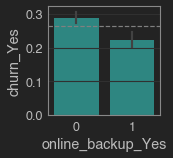


_____________________

device_protection_Yes 
_____________________

       chi2   p-value  degrees of freedom
0  6.452204  0.011081                   1

observed:
 churn_Yes                 0     1   All
device_protection_Yes                  
0                      1849   714  2563
1                      1048   332  1380
All                    2897  1046  3943

expected:
              0           1
0  1883.086736  679.913264
1  1013.913264  366.086736


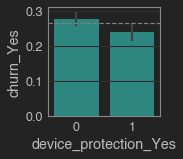


_____________________

tech_support_Yes 
_____________________

        chi2       p-value  degrees of freedom
0  82.178786  1.243171e-19                   1

observed:
 churn_Yes            0     1   All
tech_support_Yes                  
0                 1932   854  2786
1                  965   192  1157
All               2897  1046  3943

expected:
              0           1
0  2046.929242  739.070758
1   850.070758  306.929242


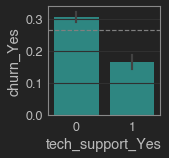


_____________________

streaming_tv_Yes 
_____________________

        chi2       p-value  degrees of freedom
0  24.717308  6.638534e-07                   1

observed:
 churn_Yes            0     1   All
streaming_tv_Yes                  
0                 1834   570  2404
1                 1063   476  1539
All               2897  1046  3943

expected:
              0           1
0  1766.266295  637.733705
1  1130.733705  408.266295


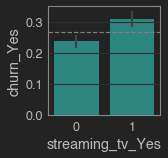


_____________________

streaming_movies_Yes 
_____________________

        chi2   p-value  degrees of freedom
0  19.904815  0.000008                   1

observed:
 churn_Yes                0     1   All
streaming_movies_Yes                  
0                     1814   572  2386
1                     1083   474  1557
All                   2897  1046  3943

expected:
              0           1
0  1753.041339  632.958661
1  1143.958661  413.041339


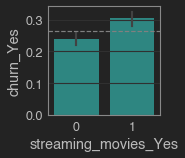


_____________________

multiple_lines_Yes 
_____________________

        chi2   p-value  degrees of freedom
0  18.805646  0.000014                   1

observed:
 churn_Yes              0     1   All
multiple_lines_Yes                  
0                   1727   542  2269
1                   1170   504  1674
All                 2897  1046  3943

expected:
              0           1
0  1667.079128  601.920872
1  1229.920872  444.079128


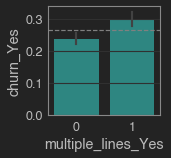


_____________________

contract_type_Month-to-month 
_____________________

         chi2        p-value  degrees of freedom
0  607.444934  4.022381e-134                   1

observed:
 churn_Yes                        0     1   All
contract_type_Month-to-month                  
0                             1631   126  1757
1                             1266   920  2186
All                           2897  1046  3943

expected:
              0           1
0  1290.902612  466.097388
1  1606.097388  579.902612


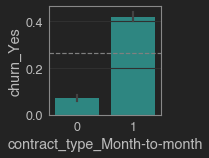


_____________________

contract_type_One year 
_____________________

         chi2       p-value  degrees of freedom
0  110.844356  6.400351e-26                   1

observed:
 churn_Yes                  0     1   All
contract_type_One year                  
0                       2174   947  3121
1                        723    99   822
All                     2897  1046  3943

expected:
             0          1
0  2293.06036  827.93964
1   603.93964  218.06036


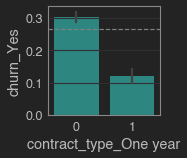


_____________________

contract_type_Two year 
_____________________

         chi2       p-value  degrees of freedom
0  349.843446  4.583861e-78                   1

observed:
 churn_Yes                  0     1   All
contract_type_Two year                  
0                       1989  1019  3008
1                        908    27   935
All                     2897  1046  3943

expected:
              0           1
0  2210.037028  797.962972
1   686.962972  248.037028


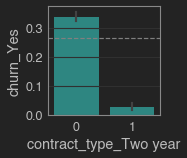


_____________________

internet_service_type_DSL 
_____________________

        chi2       p-value  degrees of freedom
0  86.833413  1.180580e-20                   1

observed:
 churn_Yes                     0     1   All
internet_service_type_DSL                  
0                          1776   809  2585
1                          1121   237  1358
All                        2897  1046  3943

expected:
              0           1
0  1899.250571  685.749429
1   997.749429  360.250571


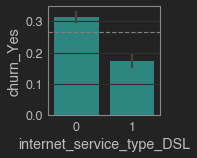


_____________________

internet_service_type_Fiber optic 
_____________________

         chi2       p-value  degrees of freedom
0  435.451953  1.057519e-96                   1

observed:
 churn_Yes                             0     1   All
internet_service_type_Fiber optic                  
0                                  1897   293  2190
1                                  1000   753  1753
All                                2897  1046  3943

expected:
              0           1
0  1609.036267  580.963733
1  1287.963733  465.036267


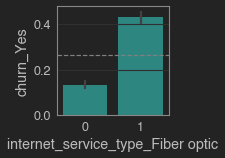


_____________________

payment_type_Bank transfer (automatic) 
_____________________

        chi2       p-value  degrees of freedom
0  40.261682  2.221231e-10                   1

observed:
 churn_Yes                                  0     1   All
payment_type_Bank transfer (automatic)                  
0                                       2192   891  3083
1                                        705   155   860
All                                     2897  1046  3943

expected:
              0           1
0  2265.141009  817.858991
1   631.858991  228.141009


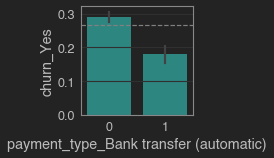


_____________________

payment_type_Credit card (automatic) 
_____________________

        chi2       p-value  degrees of freedom
0  71.674563  2.537832e-17                   1

observed:
 churn_Yes                                0     1   All
payment_type_Credit card (automatic)                  
0                                     2198   924  3122
1                                      699   122   821
All                                   2897  1046  3943

expected:
             0          1
0  2293.79508  828.20492
1   603.20492  217.79508


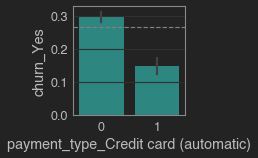


_____________________

payment_type_Electronic check 
_____________________

         chi2       p-value  degrees of freedom
0  339.705115  7.397611e-76                   1

observed:
 churn_Yes                         0     1   All
payment_type_Electronic check                  
0                              2137   440  2577
1                               760   606  1366
All                            2897  1046  3943

expected:
              0           1
0  1893.372813  683.627187
1  1003.627187  362.372813


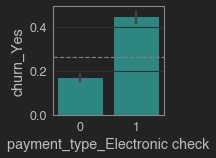


_____________________

payment_type_Mailed check 
_____________________

        chi2       p-value  degrees of freedom
0  40.787143  1.697462e-10                   1

observed:
 churn_Yes                     0     1   All
payment_type_Mailed check                  
0                          2164   883  3047
1                           733   163   896
All                        2897  1046  3943

expected:
              0           1
0  2238.691098  808.308902
1   658.308902  237.691098


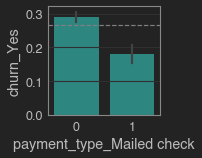


_____________________

tenure 
____________________



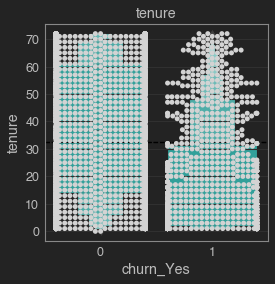

            count       mean        std  min   25%   50%   75%   max
churn_Yes                                                           
0          2897.0  37.225406  24.155257  0.0  14.0  37.0  61.0  72.0
1          1046.0  18.904398  19.686501  1.0   2.0  11.0  31.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2198265.0, pvalue=5.2432815069471204e-104)

____________________

monthly_charges 
____________________



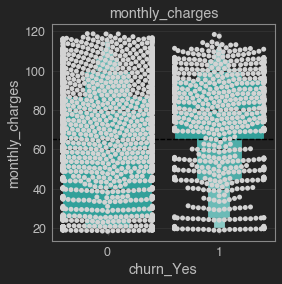

            count       mean        std    min      25%   50%    75%     max
churn_Yes                                                                   
0          2897.0  61.089368  30.927897  18.40  25.1000  64.2  86.65  118.75
1          1046.0  76.314627  24.184011  18.85  65.2125  80.5  95.05  118.35 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1087481.0, pvalue=7.816354204090865e-42)

____________________

total_charges 
____________________



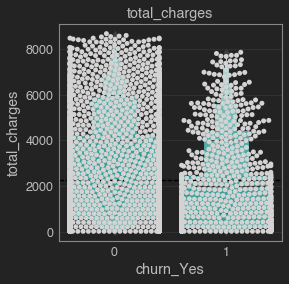

            count         mean          std    min      25%       50%  \
churn_Yes                                                               
0          2897.0  2515.925630  2317.679644  18.80  564.350  1654.450   
1          1046.0  1630.303203  1918.970319  18.85  154.975   830.775   

                 75%      max  
churn_Yes                      
0          4192.1500  8672.45  
1          2429.5625  7856.00   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1908154.5, pvalue=1.3342993074757393e-35)

____________________



In [7]:
explore.explore_bivariate(train,'churn_Yes', cat_vars, quant_vars)

In [ ]:
cat_vars = []
explore.explore_multivariate(train,'churn_Yes', cat_vars,quant_vars)